### Library Import
NumPy, pandas, matplotlib, seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [4]:
data = pd.read_csv("data/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
print("Data dims : ", data.shape)
print(data.dtypes)

Data dims :  (145460, 23)
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


## Cleaning the dataset

* Removing duplicate
* Handling missing values
* Detect and handle outliers

In [6]:
# Removing duplicates
data.drop_duplicates()
# After removing
print("Data dims : ", data.shape)

Data dims :  (145460, 23)


No duplicates were found

The extend of missing data is severe, thus imputation is applied to preserve data. First, Missing values from RainTomorrow is dropped. 

In [7]:
# Remove rows where 'RainTomorrow' is missing
data_cleaned = data.dropna(subset=['RainTomorrow'])
print("Data dims : ", data_cleaned.shape)

Data dims :  (142193, 23)


In [8]:
# Convert 'Date' to datetime and set as index for interpolation
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned.set_index('Date', inplace=True)

/var/folders/77/zprx85k56yb71r3z1m9phb3w0000gn/T/ipykernel_88634/3476562699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])


Since the data is TimeSeries, we are using interpolation for severely missing variables.  For variables with less missing values we use median and mode imputation.

In [9]:
# Define columns for imputation strategies
columns_large_missing = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
columns_few_missing_num = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 
                           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                           'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
columns_few_missing_cat = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Apply interpolation for columns with large amounts of missing data
data_cleaned[columns_large_missing] = data_cleaned[columns_large_missing].interpolate(method='time')

# Reset index
data_cleaned.reset_index(inplace=True)

# Impute missing values for columns with fewer missing values
# Numerical columns: Using median
data_cleaned[columns_few_missing_num] = data_cleaned[columns_few_missing_num].apply(lambda x: x.fillna(x.median()))

# Categorical columns: Using mode
data_cleaned[columns_few_missing_cat] = data_cleaned[columns_few_missing_cat].apply(lambda x: x.fillna(x.mode()[0]))

/var/folders/77/zprx85k56yb71r3z1m9phb3w0000gn/T/ipykernel_88634/905011771.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[columns_large_missing] = data_cleaned[columns_large_missing].interpolate(method='time')
/var/folders/77/zprx85k56yb71r3z1m9phb3w0000gn/T/ipykernel_88634/905011771.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[columns_few_missing_num] = data_cleaned[columns_few_missing_num].apply(lambda x: x.fillna(x.median()))
/var/folders/77/zprx85k56yb71r3z1m9phb3w

In [10]:
# Check for remaining missing values after initial interpolation
missing_values_after_interpolation = data_cleaned.isnull().sum()
# Display the missing values
print(missing_values_after_interpolation)

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      5939
Sunshine         5939
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            2
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64


The remaining missing values in Evaporation and Sunshine (5,939 each) couldn't be interpolated likely due to being at the start or end of the time series where adjacent values weren't available for interpolation. The 2 missing values in Cloud3pm might be a similar case or due to consecutive missing values.
For these specific residuals, given their relatively small number compared to the size of the dataset, a simple imputation like filling with the median (for Evaporation and Sunshine) or mode (for Cloud3pm) could be considered to finalize the cleaning.

In [11]:
# Final imputation for the remaining missing values
data_cleaned['Evaporation'] = data_cleaned['Evaporation'].fillna(data_cleaned['Evaporation'].median())
data_cleaned['Sunshine'] = data_cleaned['Sunshine'].fillna(data_cleaned['Sunshine'].median())
data_cleaned['Cloud3pm'] = data_cleaned['Cloud3pm'].fillna(data_cleaned['Cloud3pm'].mode()[0])

# Final check for any remaining missing values
final_check_missing = data_cleaned.isnull().sum()

final_check_missing

/var/folders/77/zprx85k56yb71r3z1m9phb3w0000gn/T/ipykernel_88634/1531799737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Evaporation'] = data_cleaned['Evaporation'].fillna(data_cleaned['Evaporation'].median())
/var/folders/77/zprx85k56yb71r3z1m9phb3w0000gn/T/ipykernel_88634/1531799737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Sunshine'] = data_cleaned['Sunshine'].fillna(data_cleaned['Sunshine'].median())
/var/folders/77/zprx85k56yb71r3z1m9phb3w0000gn/T/ipykernel_

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

All missing values have been handled!

## Outlier Detection

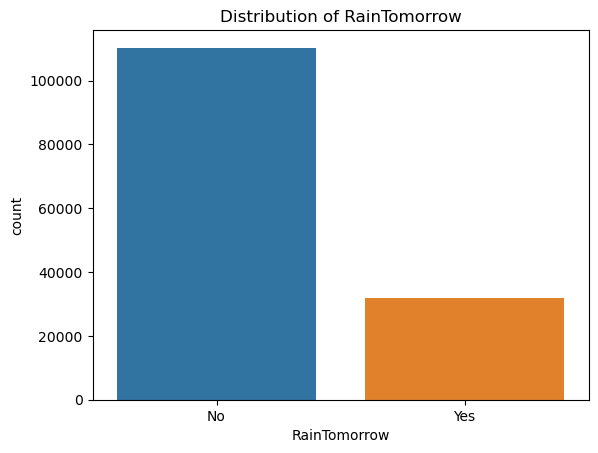

In [12]:
# Assuming 'RainTomorrow' is binary ('Yes', 'No')
sns.countplot(x='RainTomorrow', data=data_cleaned)
plt.title('Distribution of RainTomorrow')
plt.show()

In [13]:
countNotRain, countRain = data_cleaned['RainTomorrow'].value_counts()
print("Ratio of classes is NotRain : Rain = ", countNotRain, ":", countRain)

Ratio of classes is NotRain : Rain =  110316 : 31877


We need to encode data before performing correlation analysis. After finding out which variables might correlates with RainTomorrow the most, we perform univariate and multivariate EDA and handle outliers.

## Exploratory Analysis

In [19]:
object_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = [x for x in data.columns if x not in object_columns]
numerical_columns.remove('Cloud9am')
numerical_columns.remove('Cloud3pm') # remove as categorical values
object_columns.extend(['Cloud9am', 'Cloud3pm'])
object_columns.remove('Date')
print(f"Object columns: {object_columns}")
print(f"Numerical columns: {numerical_columns}")

Object columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Cloud9am', 'Cloud3pm']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [20]:
for col in object_columns:
    print(f"{col}: {data_cleaned[col].nunique()} unique values")
    print(data_cleaned[col].unique())

Location: 49 unique values
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir: 16 unique values
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am: 16 unique values
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm: 16 unique values
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday: 2 unique values
['No' 'Yes']
Rai

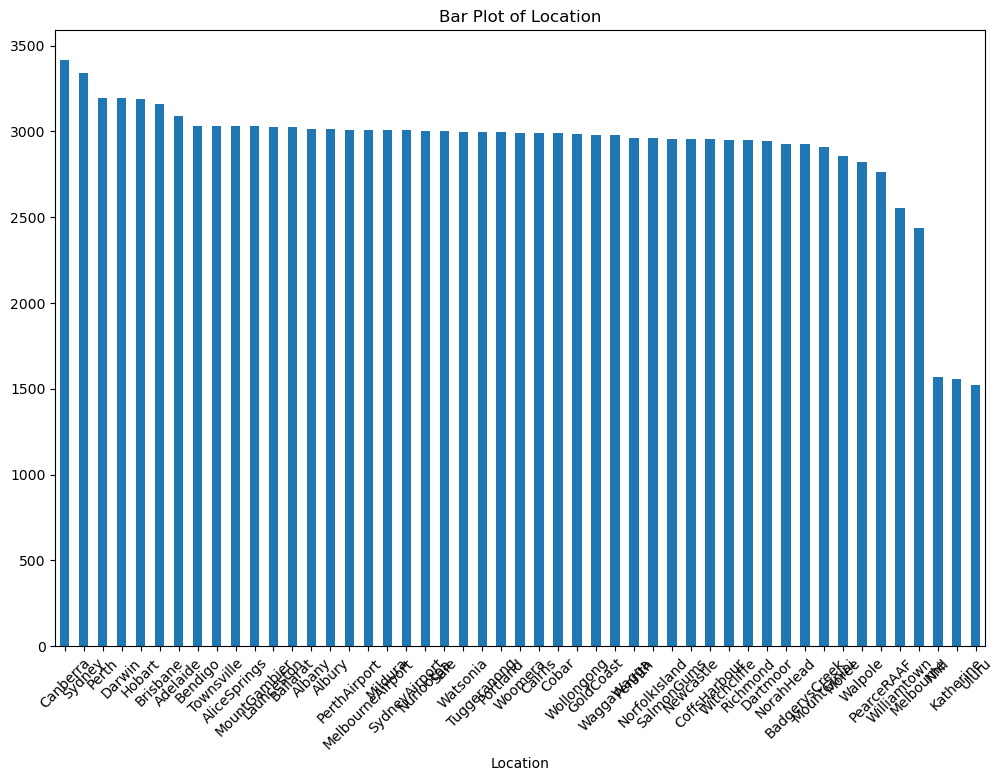

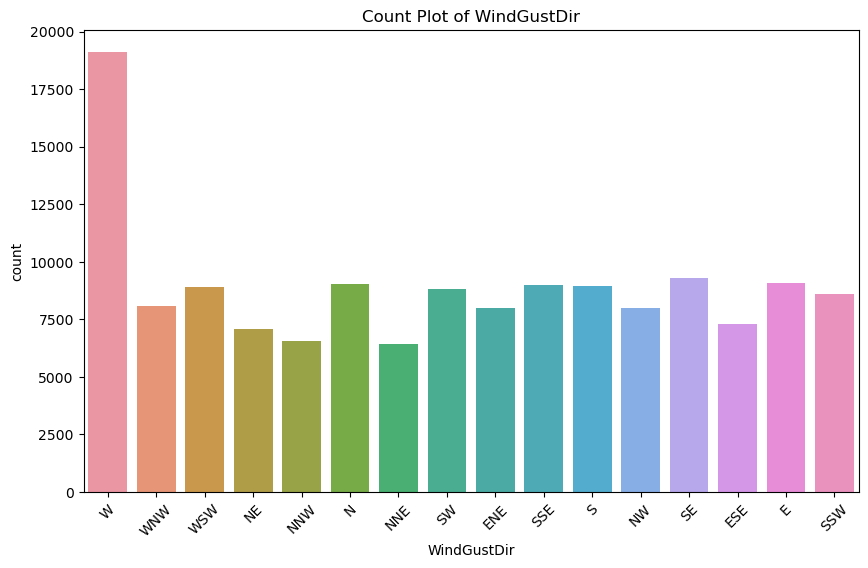

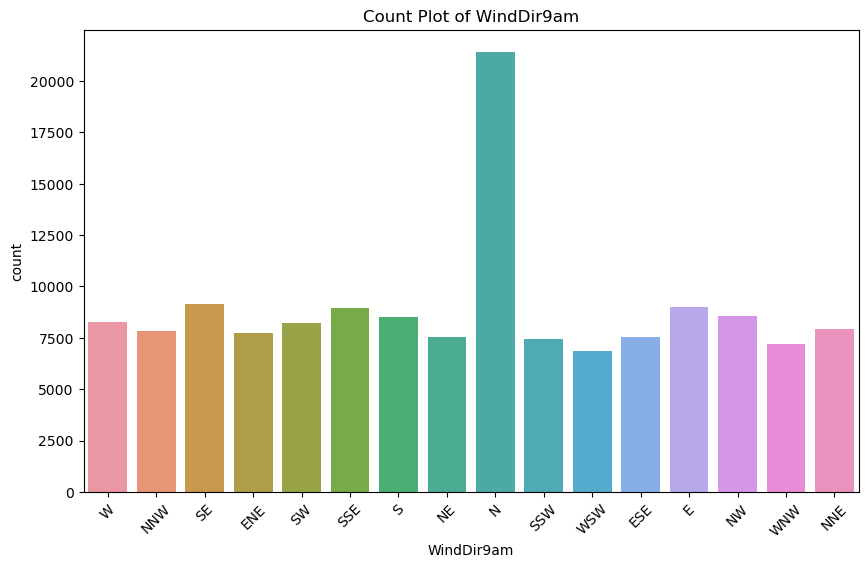

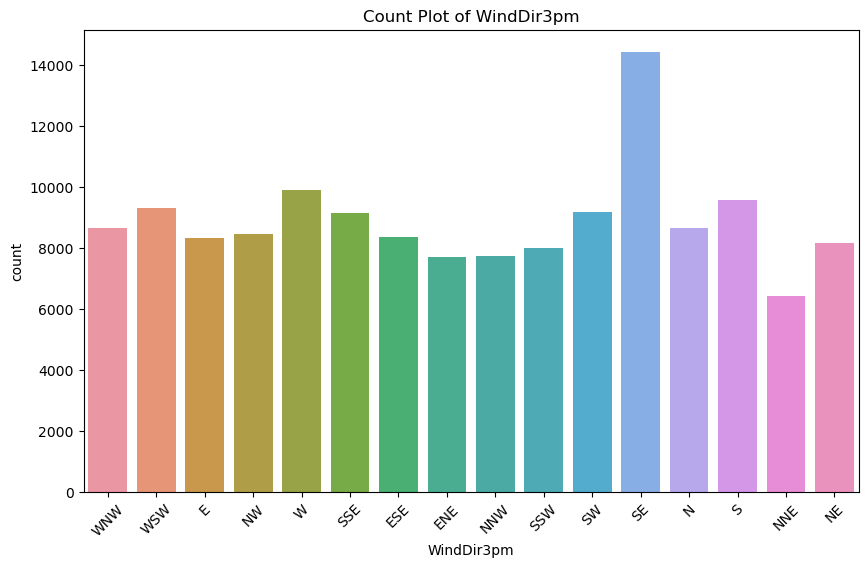

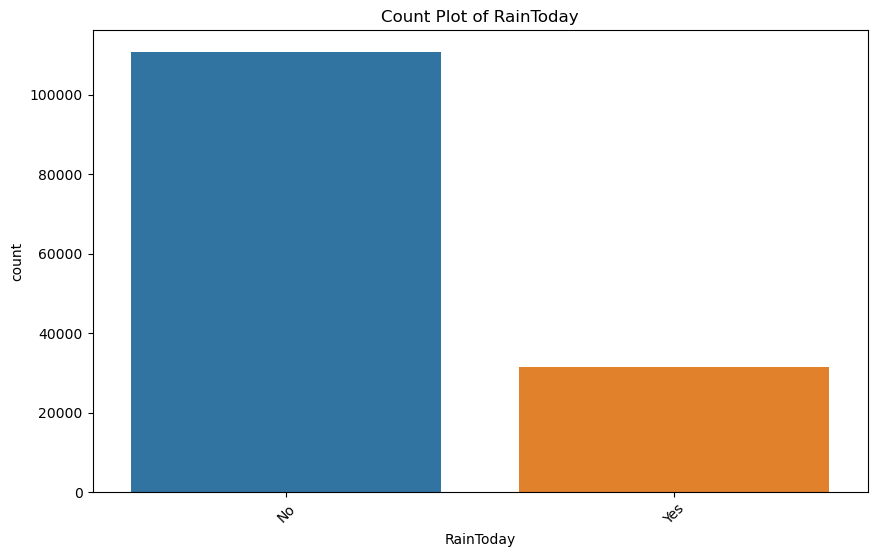

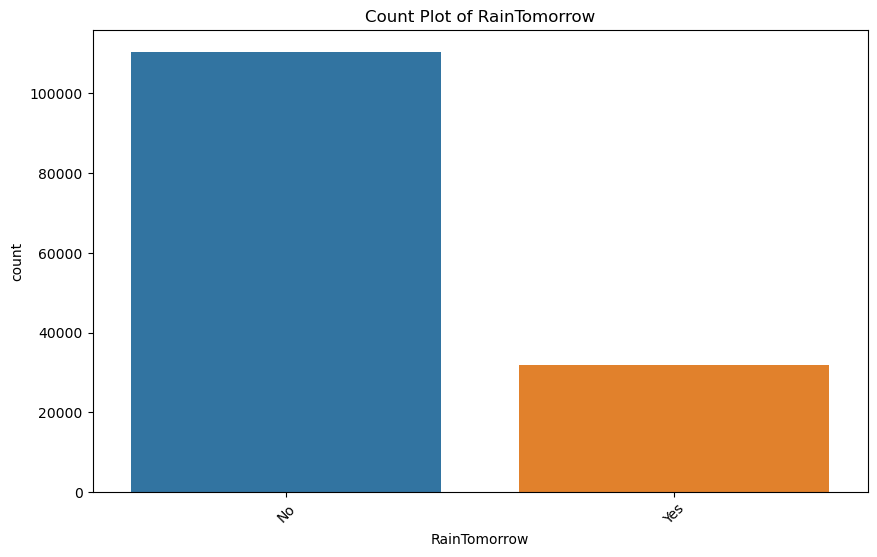

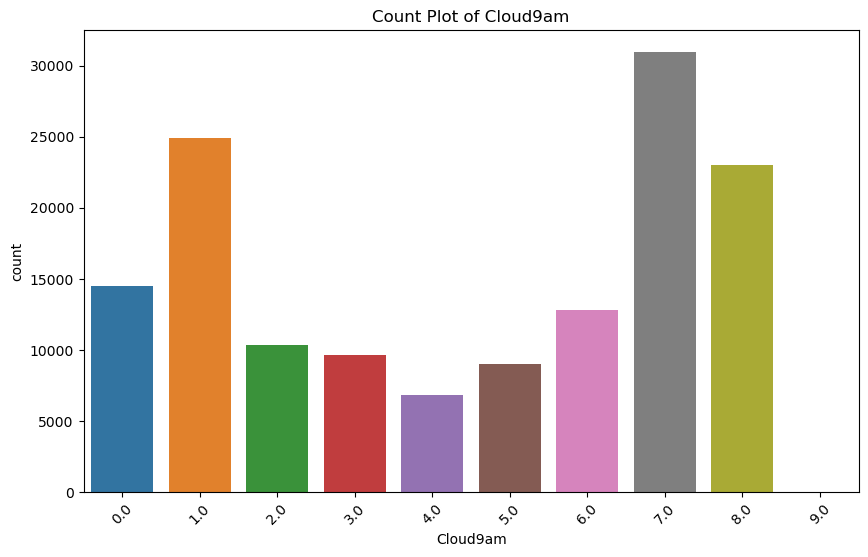

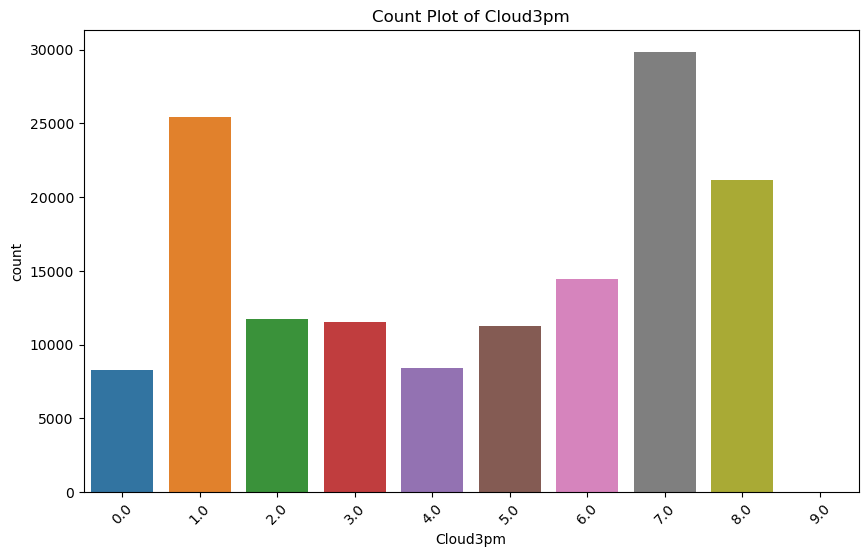

In [21]:
def visualize_categorical(data, column_name):
    unique_values = data[column_name].nunique()
    
    # Use count plot for variables with up to 20 unique values
    if unique_values <= 20:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column_name, data=data)
        plt.title(f'Count Plot of {column_name}')
        plt.xticks(rotation=45)
        plt.show()
    
    # Use a bar plot for variables with more than 20 but less than 50 unique values
    elif 20 < unique_values <= 50:
        plt.figure(figsize=(12, 8))
        data[column_name].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot of {column_name}')
        plt.xticks(rotation=45)
        plt.show()
        
    # For variables with more than 50 unique values, show the top 20 categories
    else:
        plt.figure(figsize=(12, 8))
        top_categories = data[column_name].value_counts().nlargest(20)
        sns.barplot(x=top_categories.index, y=top_categories.values)
        plt.title(f'Top 20 categories in {column_name}')
        plt.xticks(rotation=45)
        plt.show()
        
for col in object_columns:
    visualize_categorical(data_cleaned, col)

Here's what we can glean:

*   `Location` appears to have been numerically encoded with values ranging from 0 to 48. The mean and median values suggest a uniform distribution across locations if they are evenly spaced.
*   `WindGustDir`, `WindDir9am`, and `WindDir3pm` represent wind direction at different times and seem to be encoded in a manner where numerical operations can apply, which isn't typical for directional data.
*   `RainToday` and `RainTomorrow` are binary variables, likely indicating the occurrence of rain with `0` for no rain and `1` for rain. The mean close to `0.22` suggests about 22% of days had rain on the same or the next day.
*   `Cloud9am` and `Cloud3pm` might represent cloud coverage encoded to a 0-8 range, where the mean and median values suggest moderate cloudiness on average.

In [22]:
# Numeric Predictors
data_numerical = data_cleaned.drop(columns=object_columns + ['Date'])
data_numerical.head()
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,5.498064,7.615603,39.920123,13.992489,18.644279,68.858235,51.495742,1017.648460,1015.252481,16.985681,21.675977
std,6.388936,7.109617,8.426426,4.183962,3.708880,13.140632,8.851614,8.721688,18.932512,20.532227,6.746267,6.681810,6.472206,6.871243
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.800000,5.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,7.400000,10.500000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


Ok, we have a preliminary statistical summary of the dataset. From this, we can deduce the nature and scale of the variables.

*   `MinTemp` and `MaxTemp` appear to measure temperature, likely in degrees Celsius, given the range of values. The average `MinTemp` is about 13 degrees, while the average `MaxTemp` is around 24 degrees.
*   `Rainfall` suggests precipitation measurements, which seem to be in millimeters, given that the mean is 2.13 with a max of 206 mm.
*   `Evaporation` and `Sunshine` are possibly measured in millimeters and hours per day, respectively, inferred from their averages and scale.
*   Wind speed-related variables (`WindGustSpeed`, `WindSpeed9am`, and `WindSpeed3pm`) seem to be in kilometers per hour, with means ranging from 14 to nearly 40 km/h.
*   `Humidity9am` and `Humidity3pm` are likely percentages, with their 50th percentile (median) values suggesting typical morning and afternoon humidity levels.
*   `Pressure9am` and `Pressure3pm` could represent atmospheric pressure in hectopascals, with averages around 1017 hPa, typical for weather station readings.
*   `Temp9am` and `Temp3pm` further confirm daily temperature ranges, aligning with `MinTemp` and `MaxTemp`.


Now we perform encoding or categorical variable for correlation analysis

In [25]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns_label_encoding(df, columns_to_encode):
    # Copy the DataFrame to avoid modifying the original data
    encoded_df = df.copy()
    
    # Initialize LabelEncoder
    encoder = LabelEncoder()
    
    # Loop through each column to encode
    for column in columns_to_encode:
        # Apply LabelEncoder and replace the column in the DataFrame
        encoded_df[column] = encoder.fit_transform(df[column])
        
        # Print the mappings for each encoded column
        mappings = {index: label for index, label in enumerate(encoder.classes_)}
        print(f"Encoding mapping for '{column}': {mappings}")
    
    return encoded_df

# Assuming 'rain_imputed' is your DataFrame
columns_to_encode = ['RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location']

# Apply the encoding function and get the new DataFrame with specified categorical columns encoded
data_encoded = encode_categorical_columns_label_encoding(data_cleaned, columns_to_encode)

Encoding mapping for 'RainToday': {0: 'No', 1: 'Yes'}
Encoding mapping for 'RainTomorrow': {0: 'No', 1: 'Yes'}
Encoding mapping for 'WindGustDir': {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
Encoding mapping for 'WindDir9am': {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
Encoding mapping for 'WindDir3pm': {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
Encoding mapping for 'Location': {0: 'Adelaide', 1: 'Albany', 2: 'Albury', 3: 'AliceSprings', 4: 'BadgerysCreek', 5: 'Ballarat', 6: 'Bendigo', 7: 'Brisbane', 8: 'Cairns', 9: 'Canberra', 10: 'Cobar', 11: 'CoffsHarbour', 12: 'Dartmoor', 13: 'Darwin', 14: 'GoldCoast', 15: 'Hobart', 16: 'Katherine', 17: 'Launceston', 18:

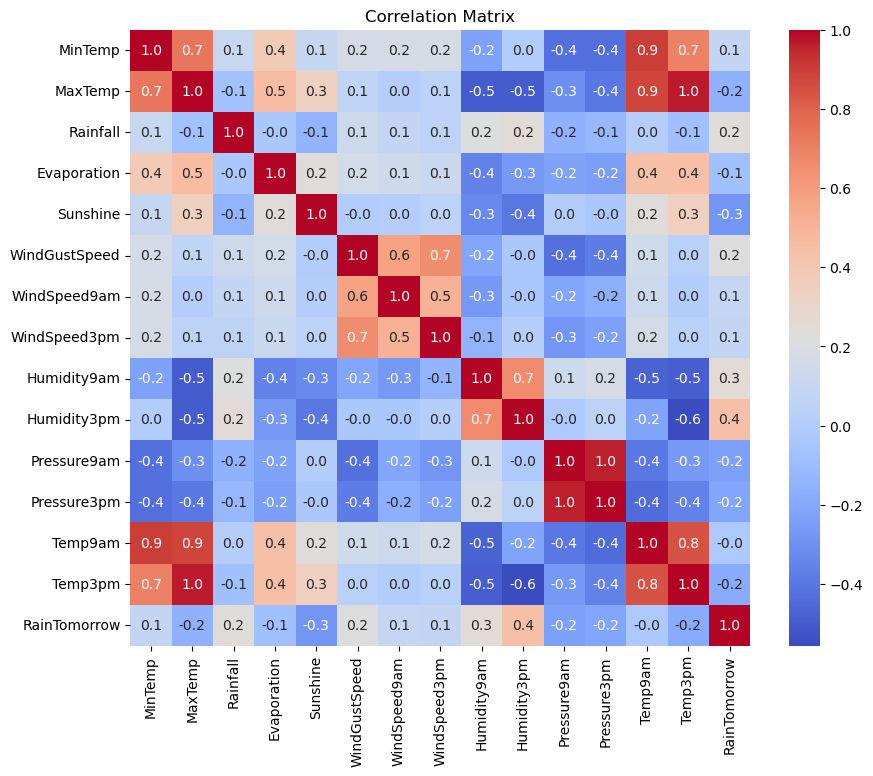

In [27]:
# Calculate the correlation matrix
correlation_matrix = pd.concat([data_numerical, data_encoded['RainTomorrow']], axis=1).corr()

# Display the correlation matrix
correlation_matrix

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

## Removing outliers for better predictors


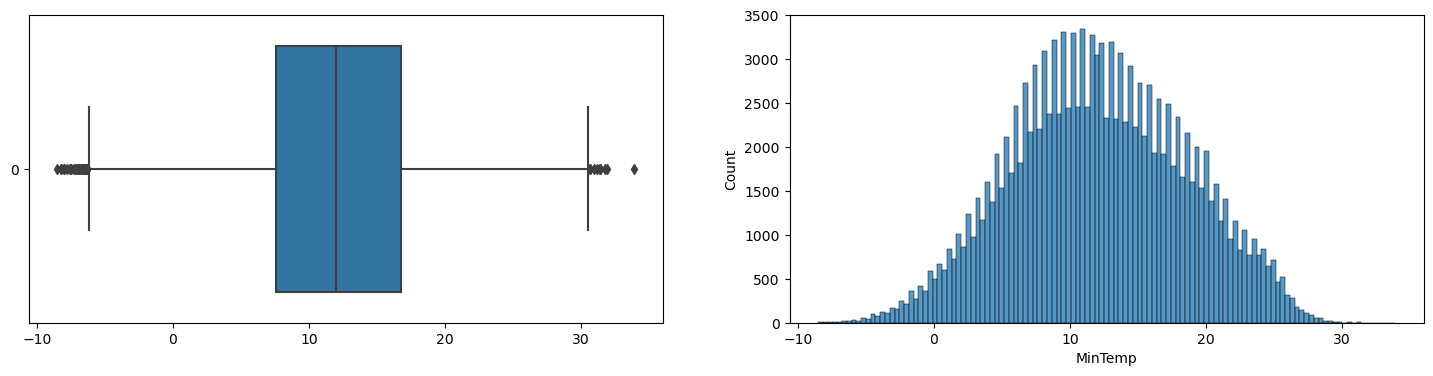

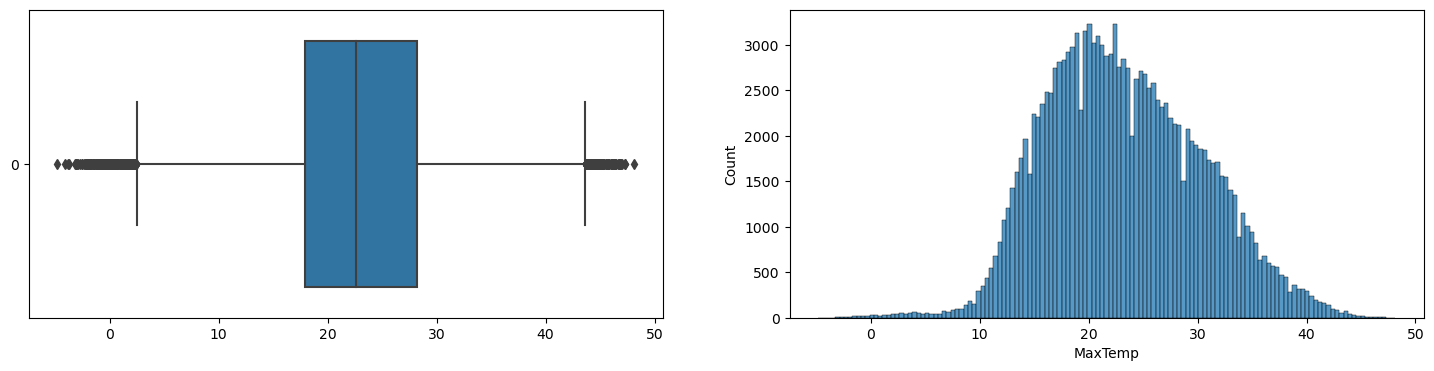

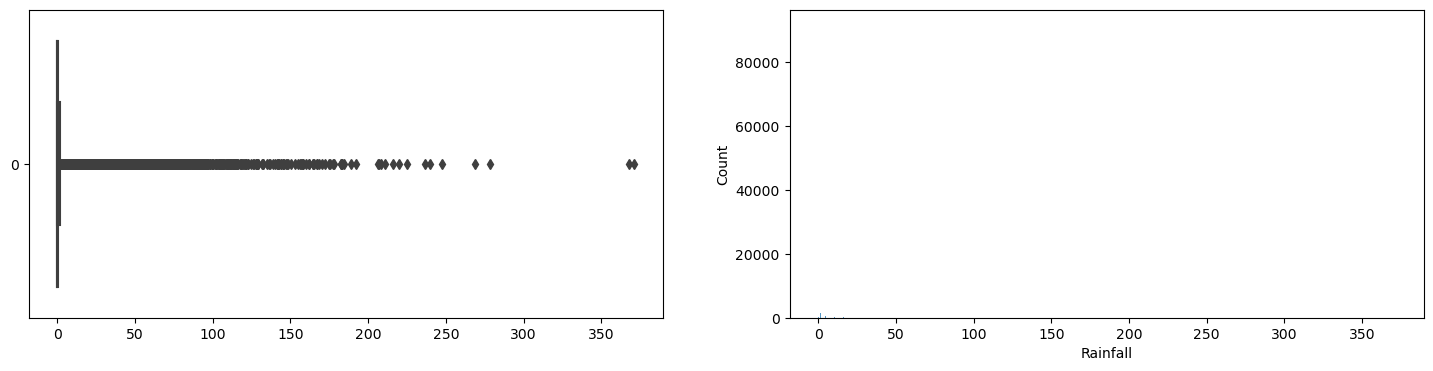

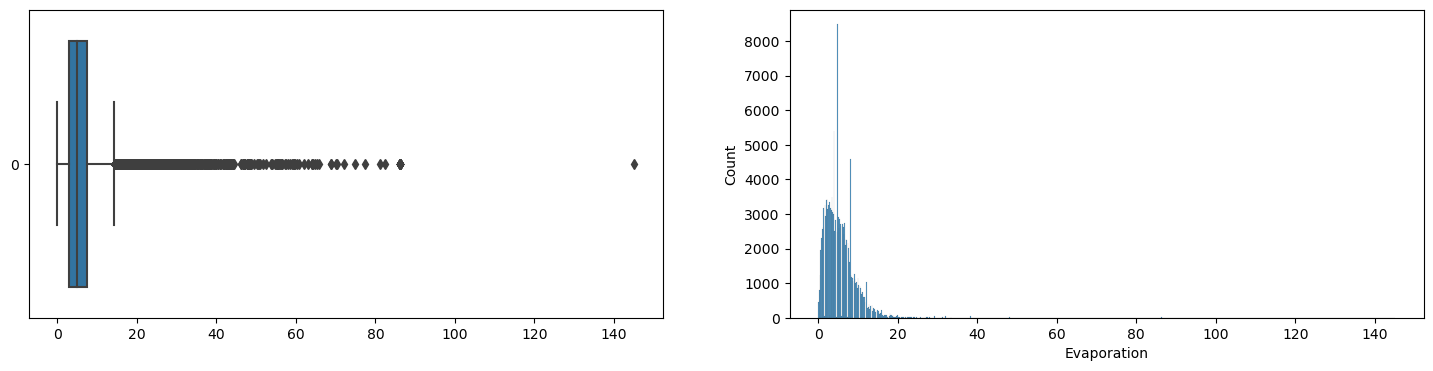

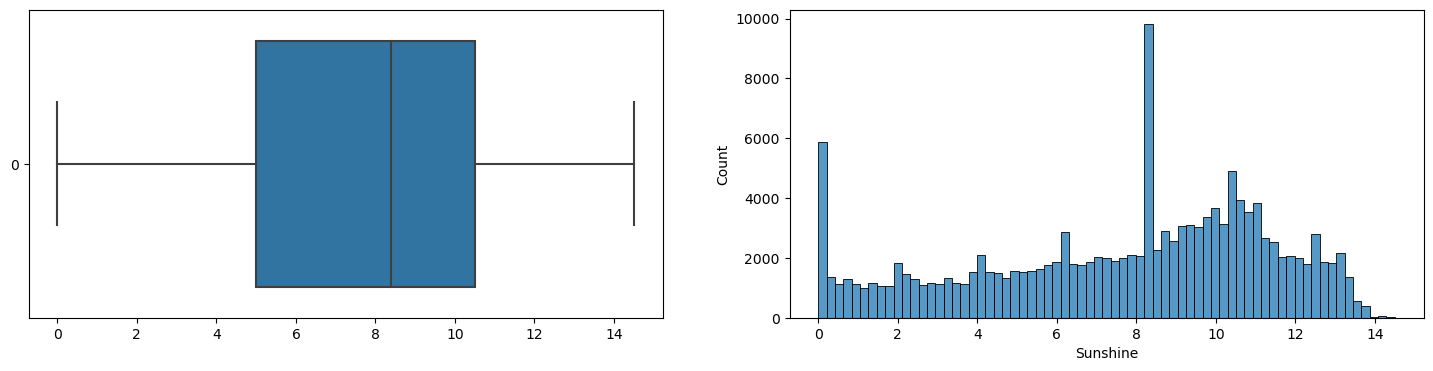

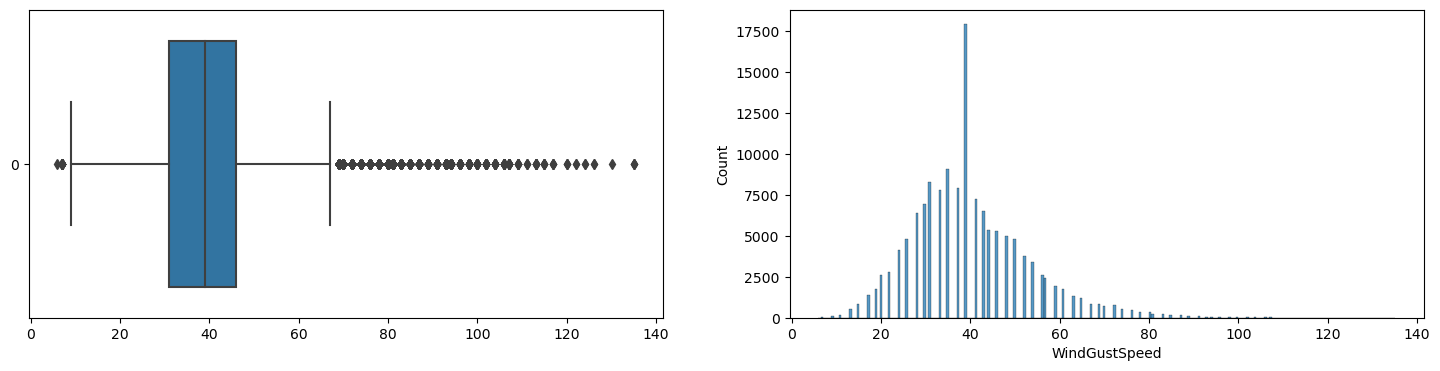

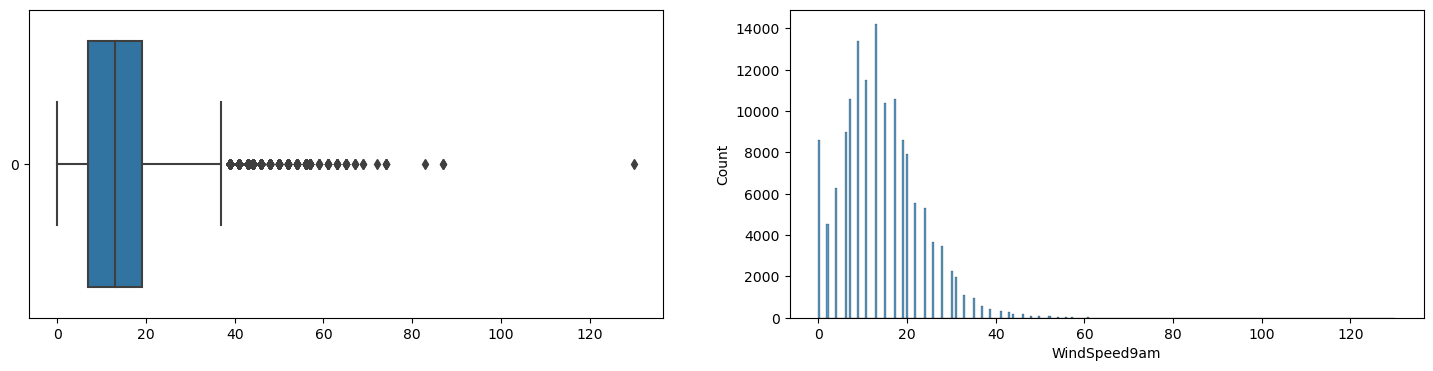

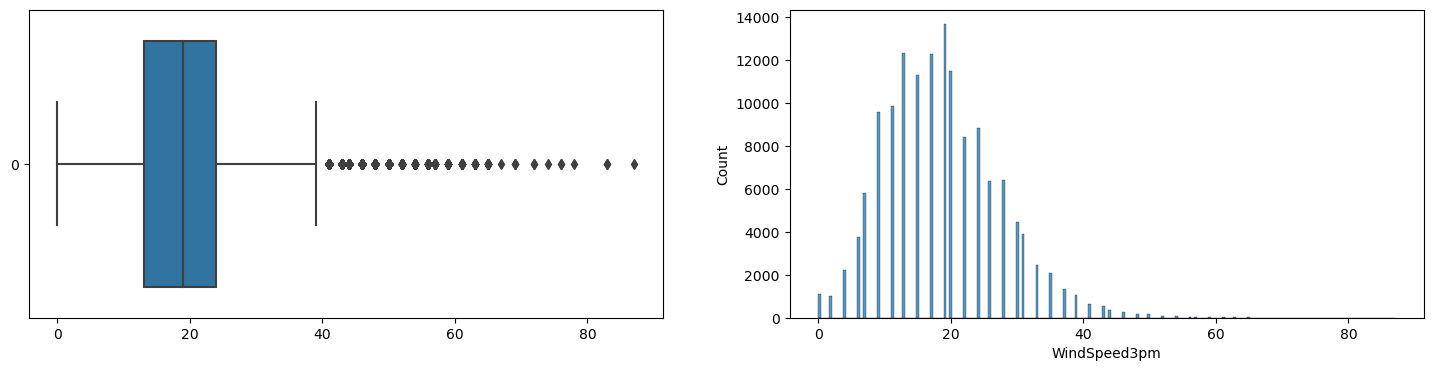

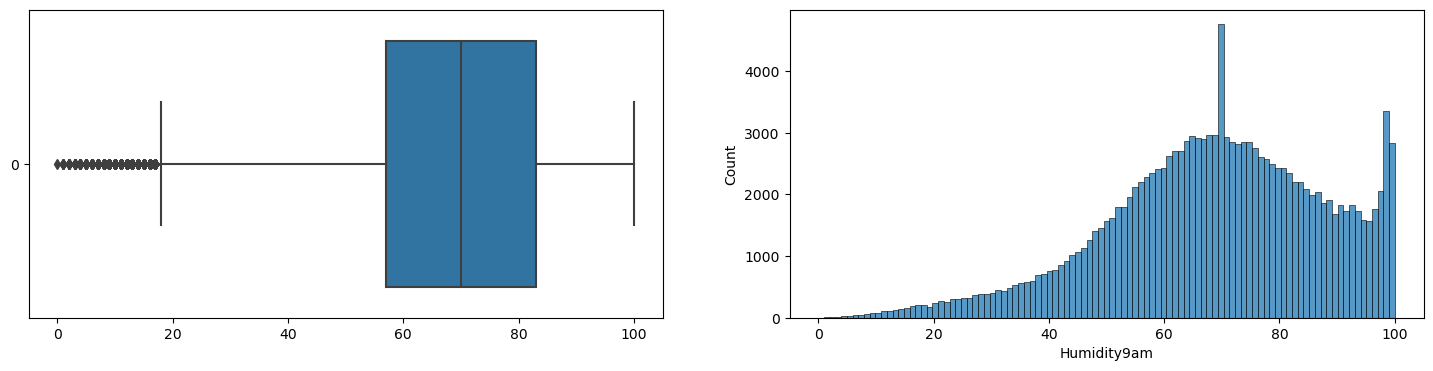

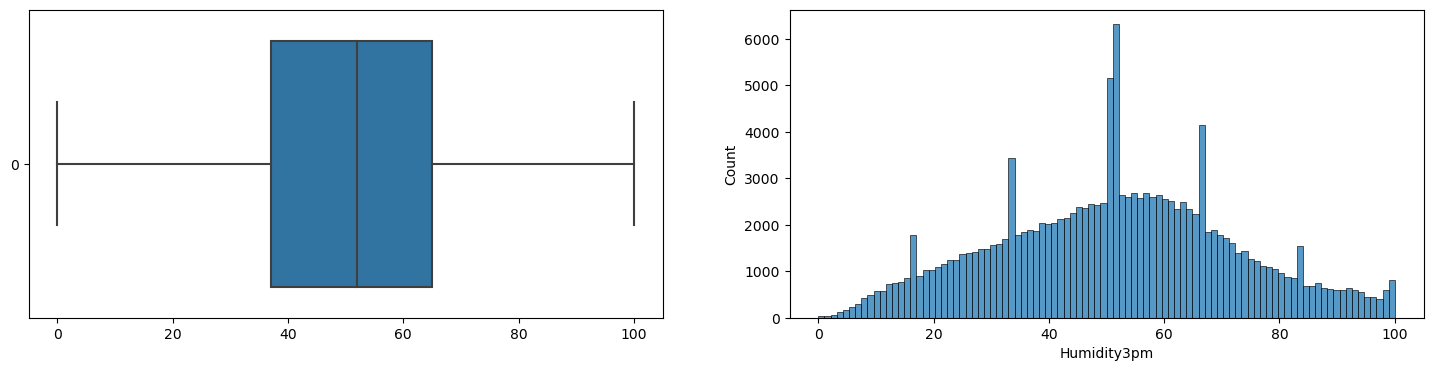

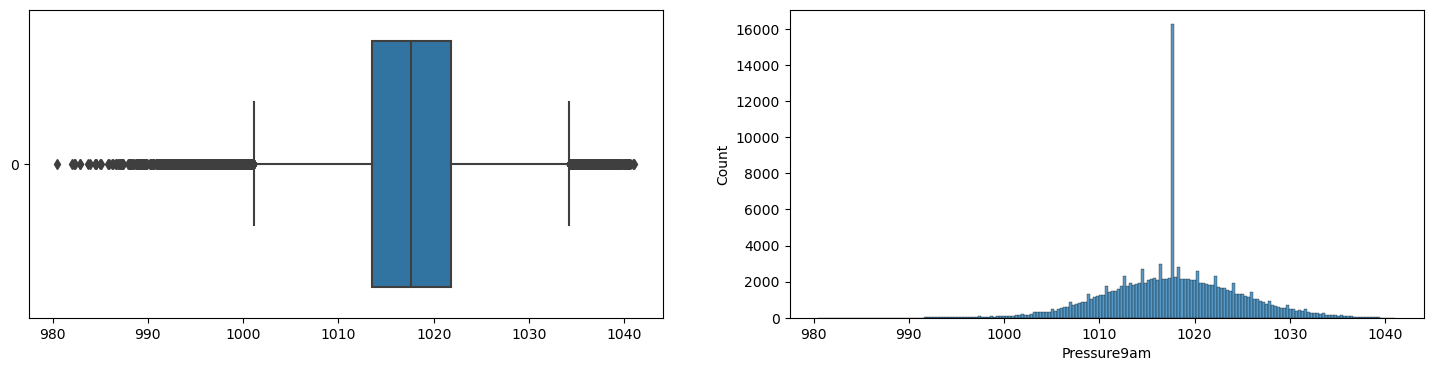

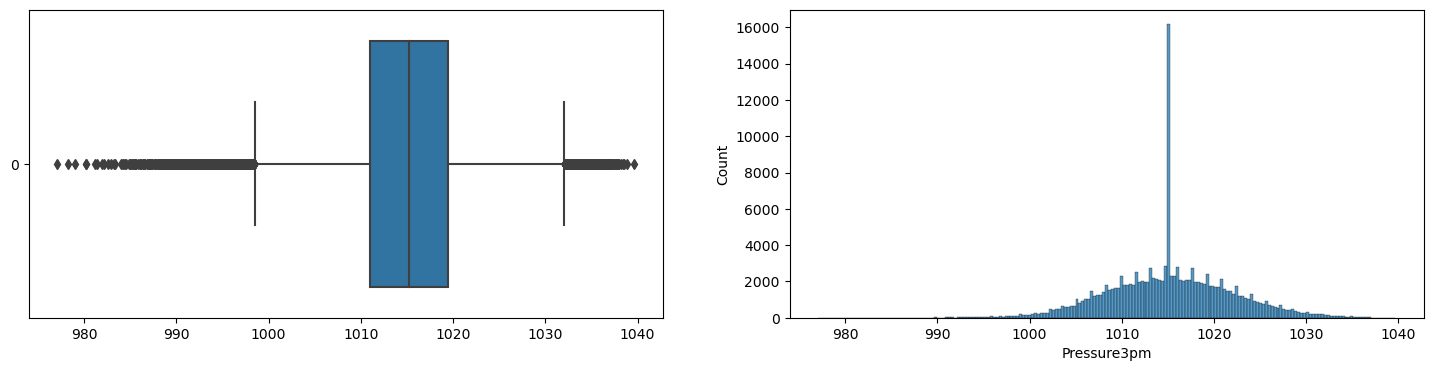

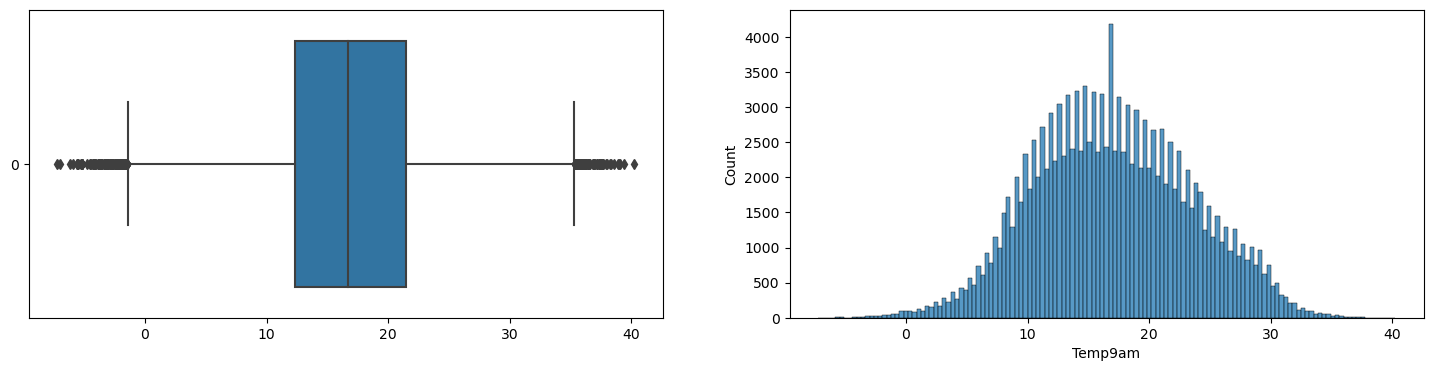

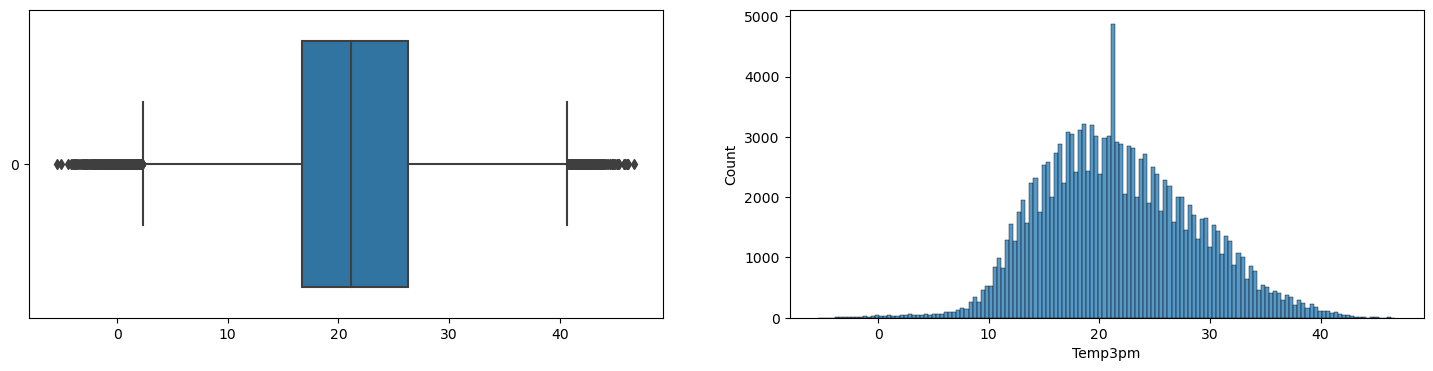

In [31]:
for col in numerical_columns:
    # Drawing for removing outliers of Humidity3pm
    f, axes = plt.subplots(1, 2, figsize=(18, 4))
    sns.boxplot(data = data_numerical[col], orient = "h", ax = axes[0])
    sns.histplot(data = data_numerical[col], ax = axes[1])

From our observations, we can see that there have been outliers in `Evaporation`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Temp9am`, `Temp3pm`, we will perform remove outliers so that our data can be much clean

In [32]:
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
    return df

In [34]:
outlier_cols = ['Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
print(f'Length of dataset before removing: ', len(data_encoded))
data_filtered = remove_outliers(data_encoded, outlier_cols)
print(f'Length of dataset after removing: ', len(data_filtered))

Length of dataset before removing:  142193
Length of dataset after removing:  126618


## Export Cleaned Data
* From `data_filtered` to `weatherAUS_cleaned_final`

In [36]:
data_filtered.to_csv("data/weatherAUS_cleaned_final.csv")